# Линейная регрессия

Давайте ограничим пространство гипотез только линейными функциями от $m+1$ аргумента, будем считать, что нулевой признак для всех объектов равен единице $x_0 = 1$:

$$\Large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\ &=& \sum_{i=0}^m w_i x_i \\ &=& \vec{x}^T \vec{w} \end{array}$$

Эмпирический риск (целевая функция) принимает форму среднеквадратичной ошибки:

$$\Large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\ &=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\ &=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$$

строки матрицы $X$ — это признаковые описания наблюдаемых объектов. Один из алгоритмов обучения $\mathcal{M}$ такой модели — это метод наименьших квадратов. Вычислим производную целевой функции:

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\ &=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) \end{array}$$

приравняем к нулю и найдем решение в явном виде:

$$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\ &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\ &\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\ &\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y} \end{array}$$

Давайте теперь попробуем реализовать это на практике.

В первую очередь, необходимо сгенерировать тестовый набор данных. Мы будем брать случайную точку на синусе и добавлять к ней шум.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.sort(np.random.choice(np.sin(np.linspace(0, 2*np.pi, num=100)), size=10, replace=True))

array([-0.99383846, -0.95490224, -0.75574957, -0.28173256,  0.25114799,
        0.77614646,  0.909632  ,  0.93414786,  0.98982144,  0.99685478])

In [3]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

Shape of X is (250,)
Head of X is [0.03144737 0.10692107 0.11950002 0.1257895  0.17610529 0.18868424
 0.40252639 0.42139481 0.42768429 0.45913166]


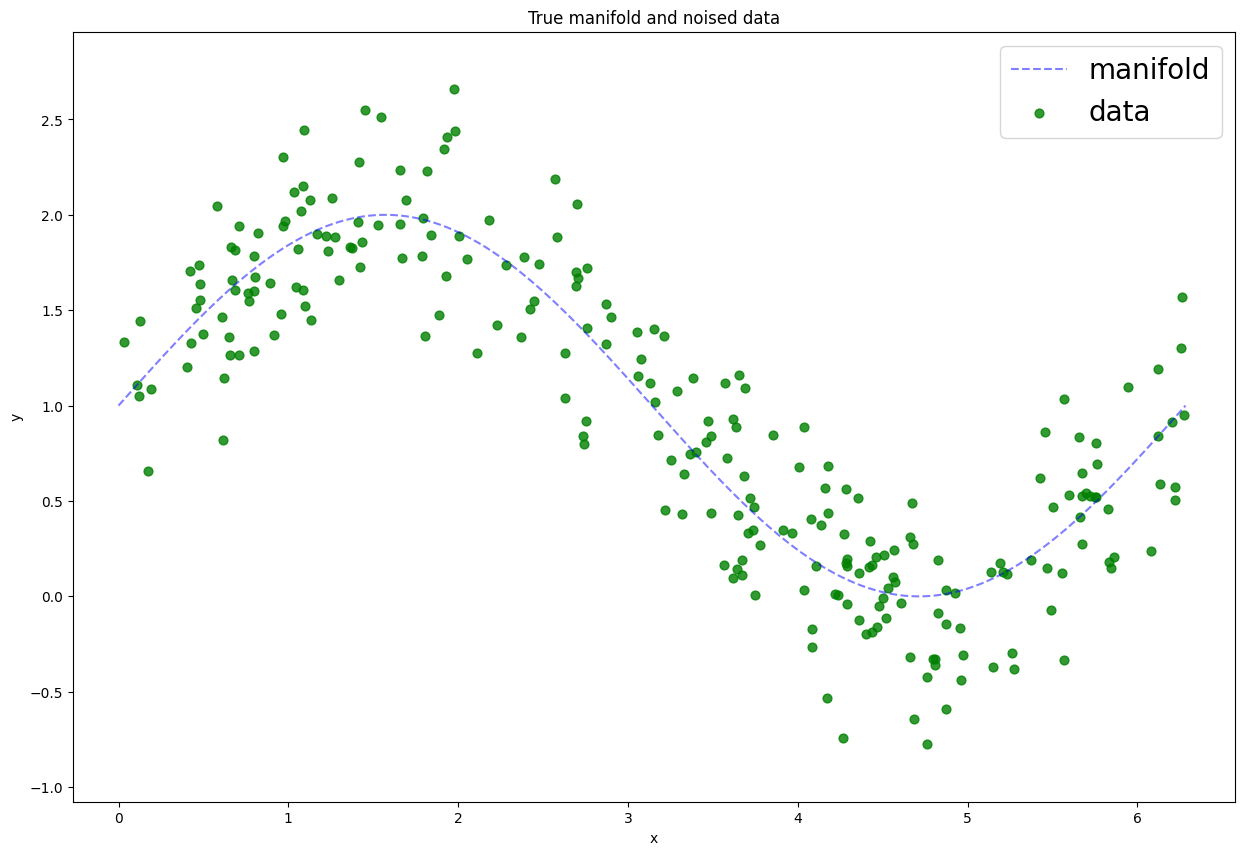

In [4]:
print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

margin = 0.3
fig = plt.figure(figsize=[15, 10])
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
import seaborn as sns
import pandas as pd

<Axes: >

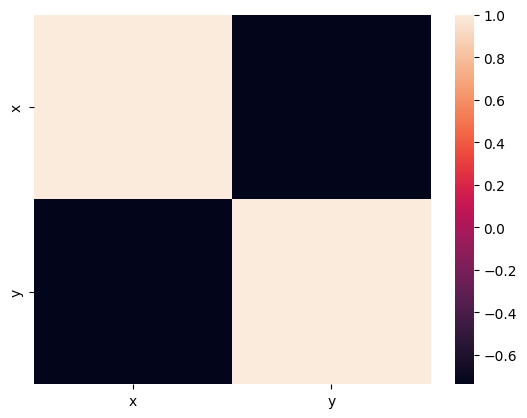

In [17]:
sns.heatmap(pd.DataFrame({'x':data['x_train'],
                          'y':data['y_train']}).corr())

Теперь реализуем алгоритм обучения, используя numpy

In [5]:
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T

In [6]:
X.shape,X.T.shape

((250, 2), (2, 250))

In [7]:
np.linalg.inv(np.dot(X.T, X))

array([[ 0.01726699, -0.00411009],
       [-0.00411009,  0.0012733 ]])

In [8]:
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

array([ 1.99803304, -0.33310757])

In [18]:
X.T[:, 0] * np.array([2.0990913 , -0.33631252])

array([ 2.0990913 , -0.01057615])

In [10]:
X.T[:, 0]

array([1.        , 0.03144737])

In [19]:
# добавим колонку единиц к единственному столбцу признаков
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
# перепишем, полученную выше формулу, используя numpy
# шаг обучения - в этом шаге мы ищем лучшую гипотезу h
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
# шаг применения: посчитаем прогноз
y_hat = np.dot(w, X.T)

In [20]:
w

array([ 1.99803304, -0.33310757])

In [21]:
y_hat

array([ 1.98755768,  1.96241682,  1.95822668,  1.95613161,  1.93937104,
        1.93518089,  1.86394846,  1.85766324,  1.85556817,  1.84509281,
        1.84090267,  1.8388076 ,  1.8388076 ,  1.83252238,  1.80528645,
        1.79481109,  1.79271602,  1.79062095,  1.78224066,  1.78014559,
        1.77805052,  1.77595545,  1.76967023,  1.76967023,  1.76128995,
        1.76128995,  1.74452937,  1.7424343 ,  1.73195894,  1.73195894,
        1.73195894,  1.72986387,  1.72357866,  1.70053287,  1.69215258,
        1.67958215,  1.67539201,  1.67539201,  1.67120187,  1.65444129,
        1.65025115,  1.64606101,  1.63977579,  1.63558565,  1.63558565,
        1.63349058,  1.6313955 ,  1.62301522,  1.62092015,  1.60834972,
        1.59158914,  1.587399  ,  1.57901871,  1.5727335 ,  1.56644828,
        1.5434025 ,  1.53921235,  1.52873699,  1.52664192,  1.52454685,
        1.52035671,  1.51407149,  1.48893063,  1.48264542,  1.44493413,
        1.44493413,  1.44283906,  1.43445877,  1.4030327 ,  1.40

In [22]:
np.mean(np.abs(y_hat - data['y_train']))

0.442176041655859

In [23]:
np.mean((y_hat - data['y_train'])**2)

0.29064991219991965

In [24]:
np.mean((y_hat - data['y_train'])**2)**(1/2)

0.5391195713382326

In [25]:
np.linalg.inv(np.array([[1, 2], [3, 4]]))

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [26]:
np.dot(
    np.array(
        [[-2. ,  1. ],
        [ 1.5, -0.5]]
    ),
    np.array([[1, 2], [3, 4]])
)

array([[1., 0.],
       [0., 1.]])

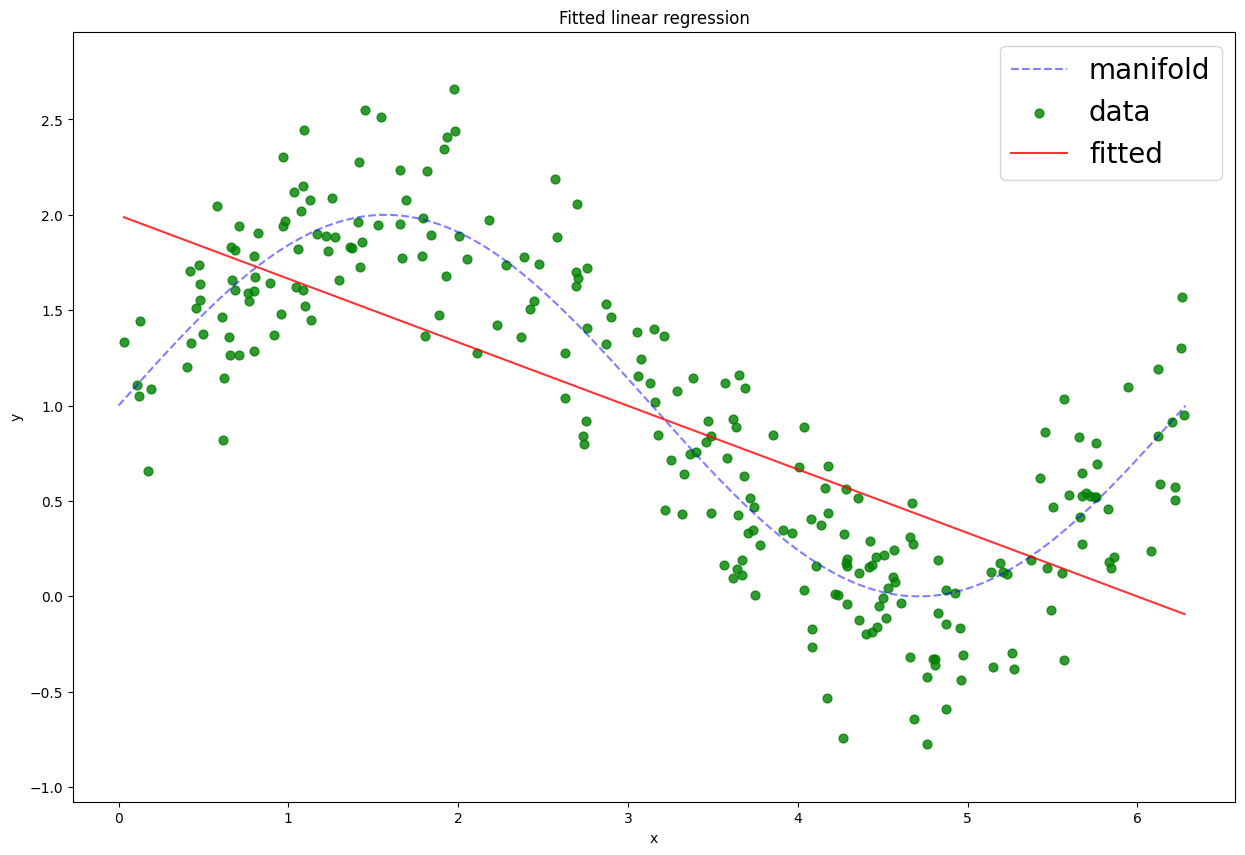

In [27]:
margin = 0.3
fig = plt.figure(figsize=[15, 10])
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
print("Среднеквадратичная ошибка =", np.sum((data['y_train'] - y_hat)**2) / (len(y_hat)))

Среднеквадратичная ошибка = 0.29064991219991965


In [29]:
w

array([ 1.99803304, -0.33310757])

## Полиномиальная регрессия

In [30]:
# map(f, list_)

In [31]:
list(map(lambda x: x[0]+x[1], [(1,2),(3,4)]))

[3, 7]

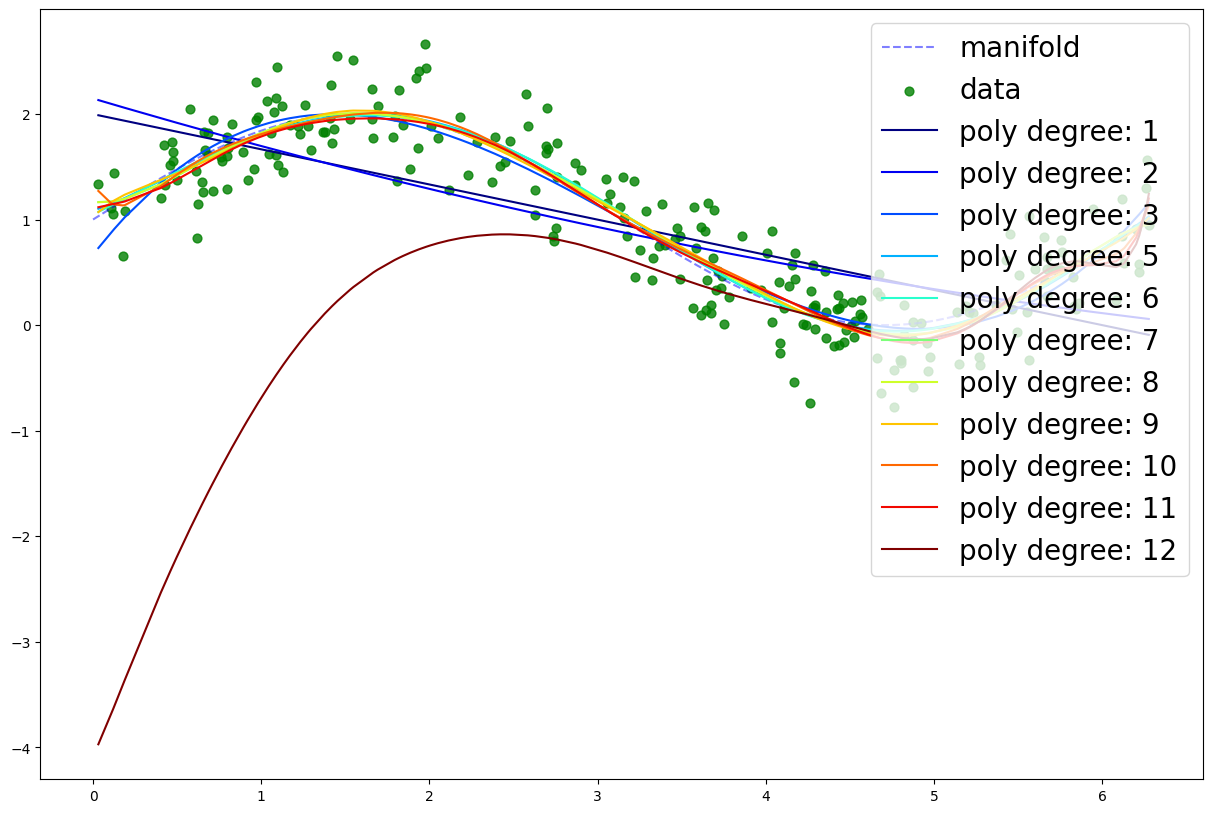

In [39]:
# список степеней p полиномов, который мы протестируем
degree_list = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
fig = plt.figure(figsize=[15, 10])
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # список с предрасчитанными степенями признака
    dlist = [np.ones(data['x_train'].shape[0])] + \
                list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()

1     0.290650
2     0.286811
3     0.106155
5     0.100707
6     0.100654
7     0.100095
8     0.100095
9     0.099672
10    0.098140
11    0.097951
12    2.626547
Name: mse, dtype: float64

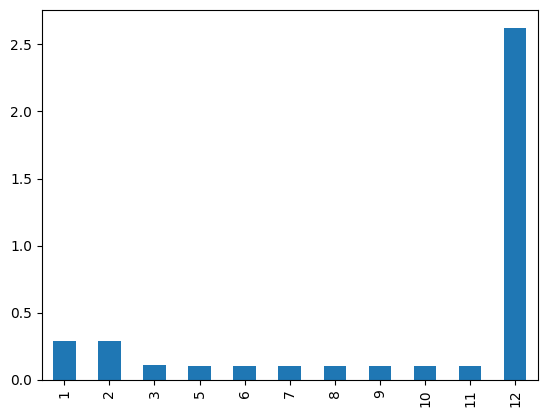

In [40]:

display(pd.Series(err, index=degree_list, name='mse'))
pd.Series(err, index=degree_list, name='mse').plot.bar();

## Sklearn

**scikit-learn** (sklearn) - библиотека машинного обучения для python.

Реализованы все популярные алгоритмы машинного обучения, начиная с простых линейных, заканчивая достаточно сложными композициями алгоритмов.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr

LinearRegression()

In [ ]:
data['x_train'].reshape(-1,1).shape

(250, 1)

In [ ]:
lr.fit(data['x_train'].reshape(-1, 1), data['y_train'])

LinearRegression()

In [ ]:
print(lr.intercept_, lr.coef_[0])
print(w)

1.991111415925515 -0.3169305475911444
[ 1.07597589  0.52682342  0.66573594 -0.55147944  0.11258395 -0.00697503]


In [ ]:
mae_a = np.mean(np.abs(y_hat - data['y_train']))

In [ ]:
mse_a = np.mean((y_hat - data['y_train'])**2)

In [ ]:
import pandas as pd

In [ ]:
y_pr = lr.predict(data['x_test'].reshape(-1,1))

KeyError: 'x_test'

In [ ]:
pd.DataFrame(lr.predict(data['x_train'].reshape(-1,1)))

,0
0,1.991111
1,1.987125
2,1.983138
3,1.961212
4,1.961212
...,...
245,0.051605
246,0.043631
247,0.017718
248,0.011738


In [ ]:
mae_o = np.mean(np.abs(
    lr.predict(data['x_train'].reshape(-1, 1)) - data['y_train']))

In [ ]:
mse_o = np.mean((lr.predict(data['x_train'].reshape(-1, 1)) - data['y_train'])**2)

In [ ]:
print(mae_a, mae_o)

0.23978639954456712 0.45771785042075064


In [ ]:
print(mse_a, mse_o)

0.08722096376605415 0.303220893527548


In [ ]:
mae_a-mae_o,mse_a-mse_o

(-0.2179314508761835, -0.21599992976149385)

In [ ]:
(1 -mae_a/mae_o)*100,(1-mse_a/mse_o)*100

(47.612617833421425, 71.23517355570024)

In [ ]:
lr.predict([[-7]])